In [1]:
!pip install kaggle

In [2]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d garystafford/environmental-sensor-data-132k


100% 6.74M/6.74M [00:00<00:00, 69.8MB/s]
100% 6.74M/6.74M [00:00<00:00, 67.8MB/s]


In [5]:
!unzip environmental-sensor-data-132k.zip


Archive:  environmental-sensor-data-132k.zip
  inflating: iot_telemetry_data.csv  


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('iot_telemetry_data.csv')

In [8]:
print(df.head())

             ts             device        co   humidity  light       lpg  \
0  1.594512e+09  b8:27:eb:bf:9d:51  0.004956  51.000000  False  0.007651   
1  1.594512e+09  00:0f:00:70:91:0a  0.002840  76.000000  False  0.005114   
2  1.594512e+09  b8:27:eb:bf:9d:51  0.004976  50.900000  False  0.007673   
3  1.594512e+09  1c:bf:ce:15:ec:4d  0.004403  76.800003   True  0.007023   
4  1.594512e+09  b8:27:eb:bf:9d:51  0.004967  50.900000  False  0.007664   

   motion     smoke       temp  
0   False  0.020411  22.700000  
1   False  0.013275  19.700001  
2   False  0.020475  22.600000  
3   False  0.018628  27.000000  
4   False  0.020448  22.600000  


In [9]:
print(df.describe())

                 ts             co       humidity            lpg  \
count  4.051840e+05  405184.000000  405184.000000  405184.000000   
mean   1.594858e+09       0.004639      60.511694       0.007237   
std    1.994984e+05       0.001250      11.366489       0.001444   
min    1.594512e+09       0.001171       1.100000       0.002693   
25%    1.594686e+09       0.003919      51.000000       0.006456   
50%    1.594858e+09       0.004812      54.900000       0.007489   
75%    1.595031e+09       0.005409      74.300003       0.008150   
max    1.595203e+09       0.014420      99.900002       0.016567   

               smoke           temp  
count  405184.000000  405184.000000  
mean        0.019264      22.453987  
std         0.004086       2.698347  
min         0.006692       0.000000  
25%         0.017024      19.900000  
50%         0.019950      22.200000  
75%         0.021838      23.600000  
max         0.046590      30.600000  


#**Exploratory Data Analysis**

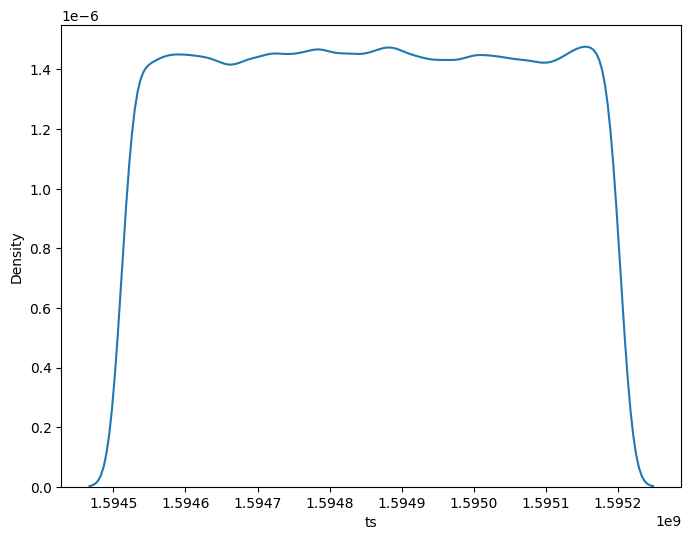

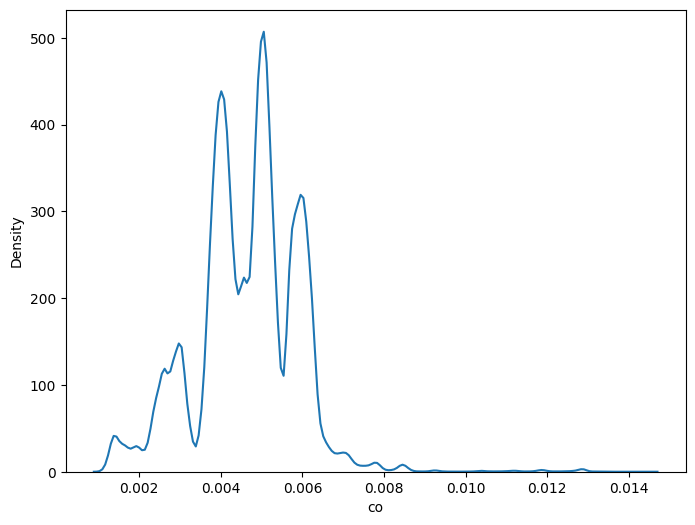

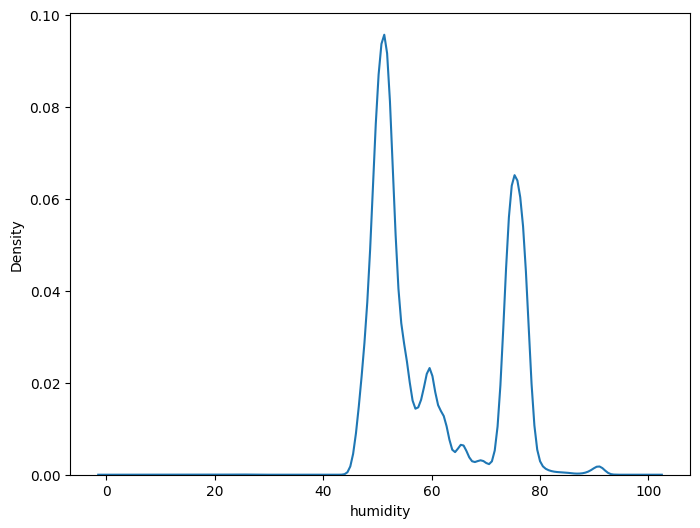

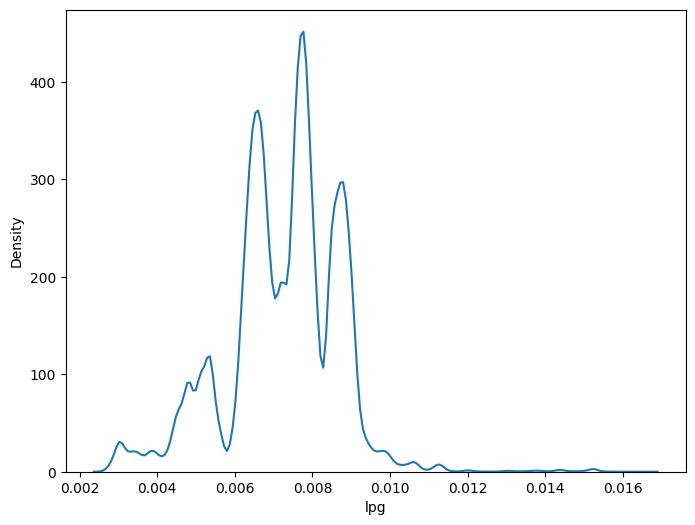

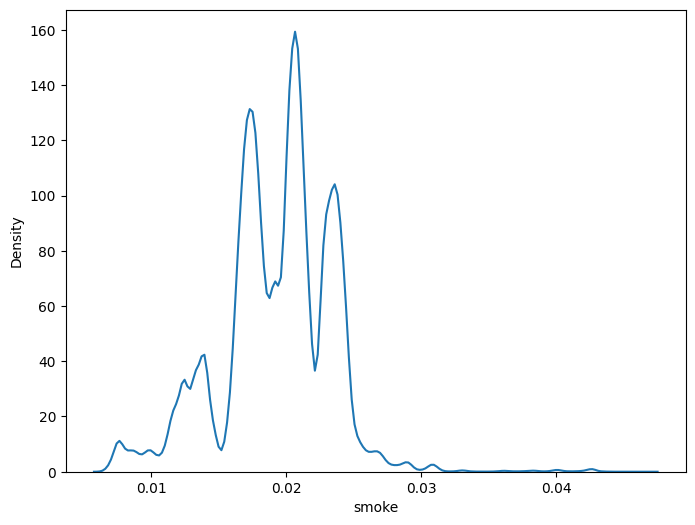

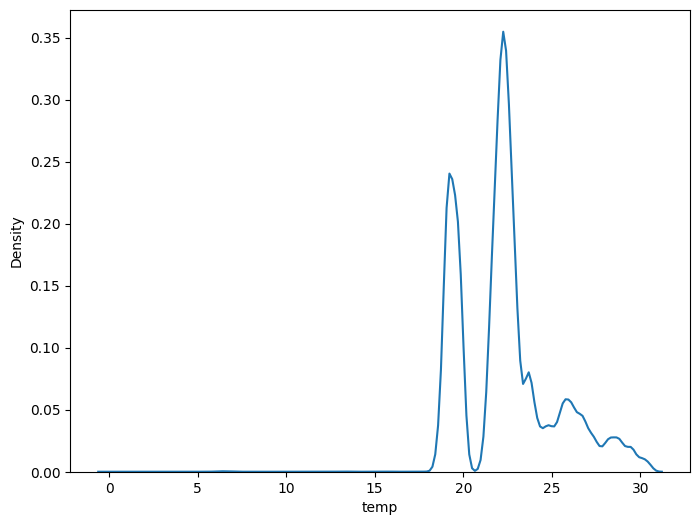

In [24]:
for i in data.columns:
    if data[i].nunique() > 5:
        plt.figure(figsize=(8, 6))
        sns.kdeplot(x=i, data=data)
        plt.show()

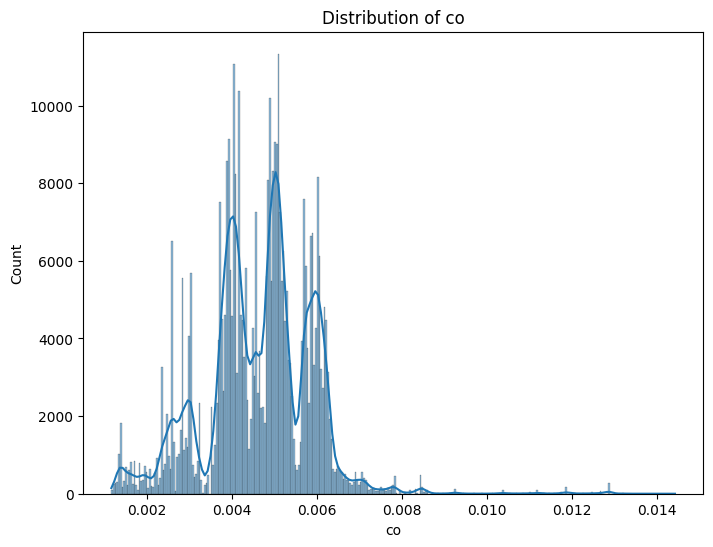

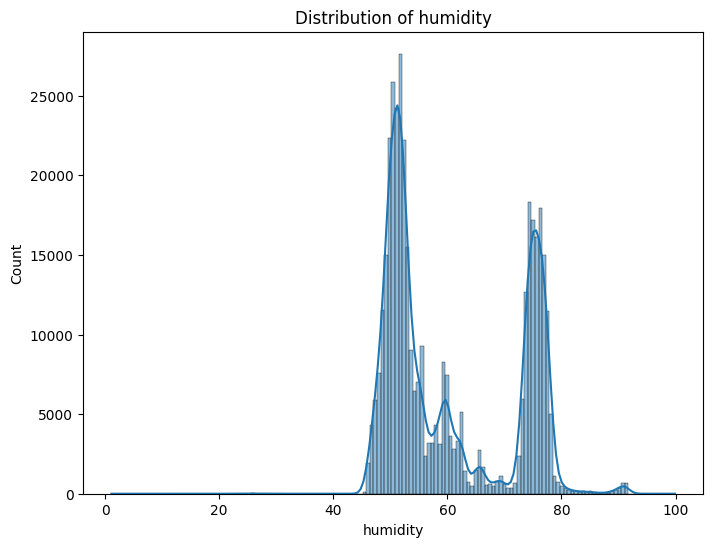

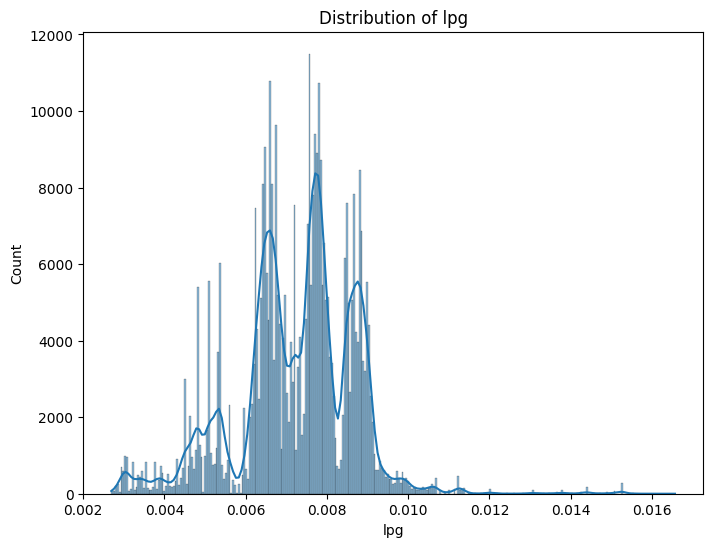

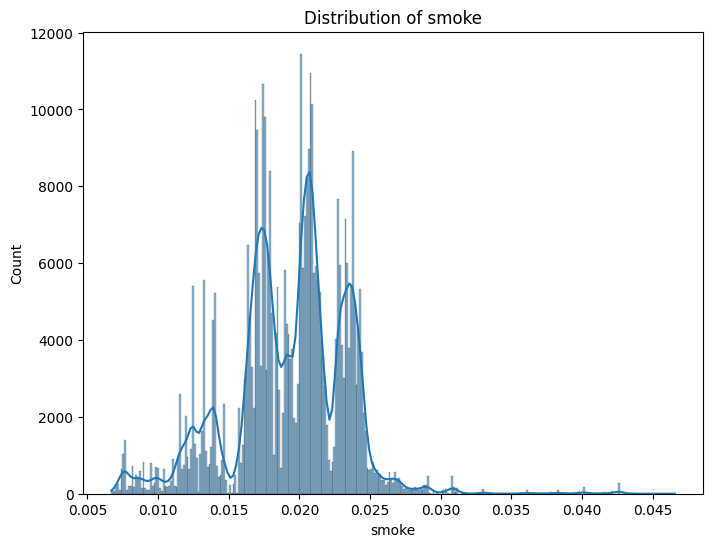

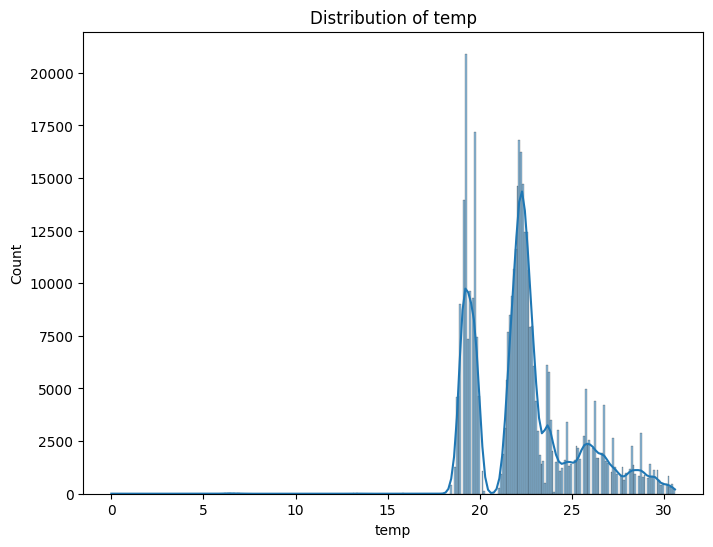

In [25]:
# Distribution plot
numerical_columns = ['co', 'humidity', 'lpg', 'smoke', 'temp']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

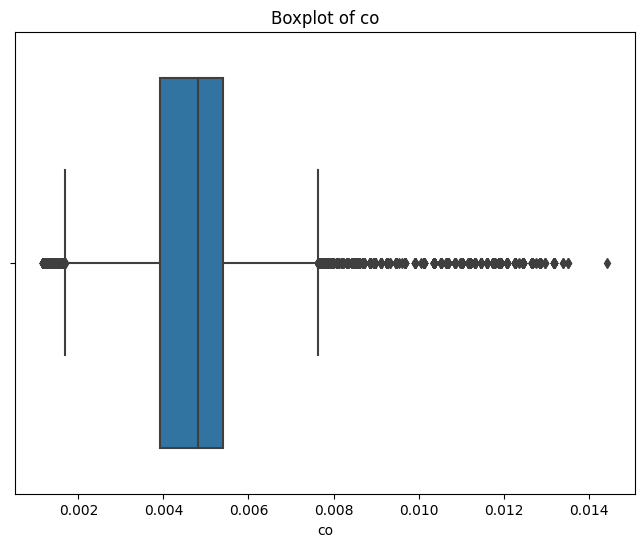

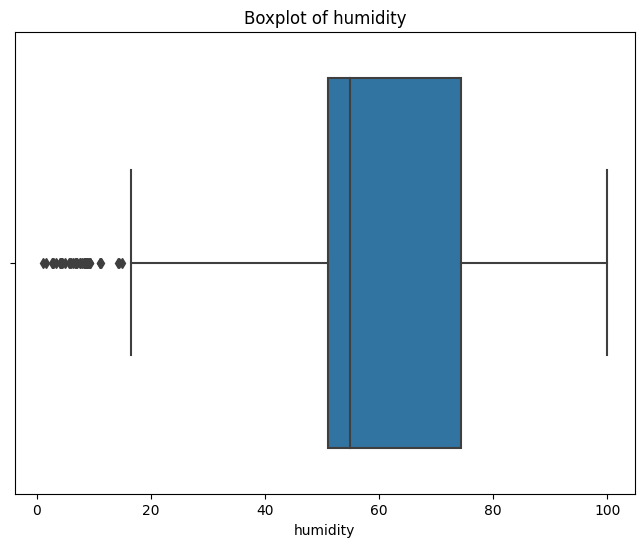

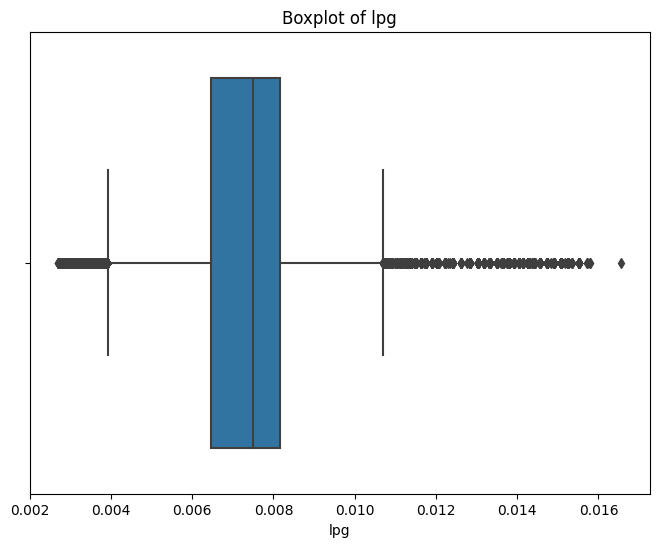

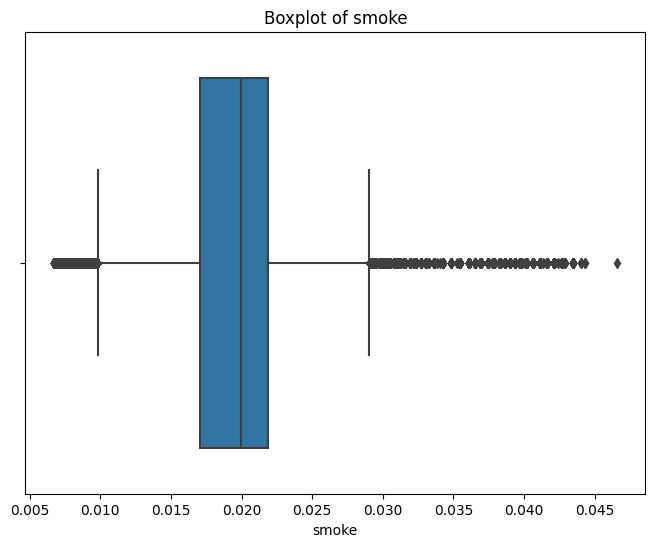

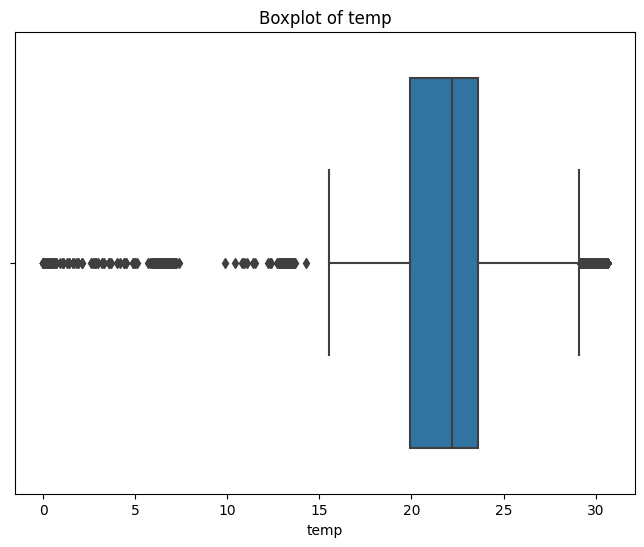

In [11]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

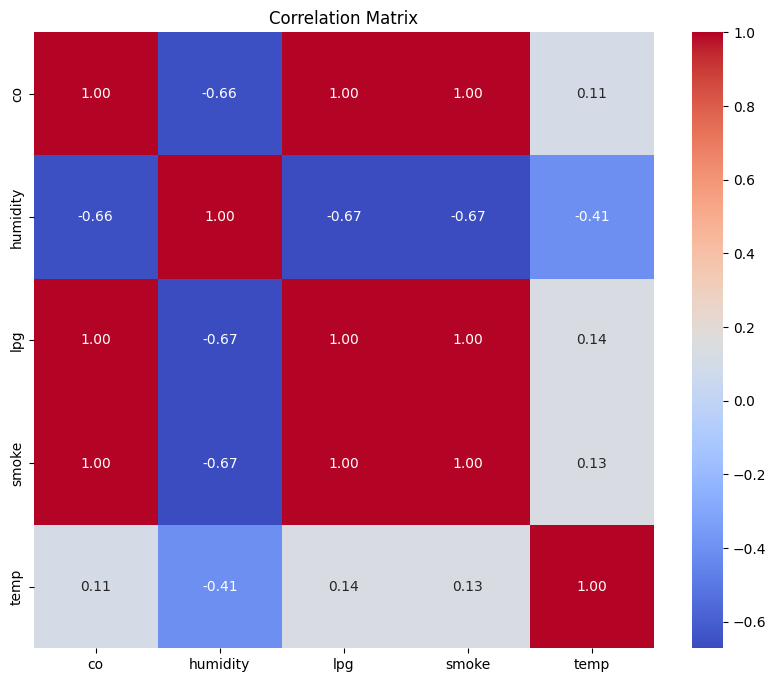

In [26]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## **KNN Algorithm implementation**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

features = ['humidity', 'lpg', 'smoke', 'temp']
target = 'co'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using "StandardScaler"
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=features)

#KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5, metric='euclidean')

knn_model.fit(X_train_scaled, y_train)

# Predict carbon monoxide content on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Example: Make a prediction for a new data point
new_data_point = pd.DataFrame(np.array([[78, 0.005, 0.01, 26]]), columns=features)  # Example values for the features
new_data_point_scaled = pd.DataFrame(scaler.transform(new_data_point), columns=features)
prediction = knn_model.predict(new_data_point_scaled)
print(f'Predicted Carbon Monoxide Content: {prediction[0]}')


Mean Squared Error: 6.711998401937752e-11
Predicted Carbon Monoxide Content: 0.00353719525489708
